In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [12]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

5


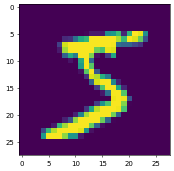

In [13]:
plt.figure(dpi=50)
plt.imshow(X_train[0])
print(y_train[0])

In [23]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
(X_train,y_train), (X_test,y_test) = (X_train/255,y_train), (X_test/255,y_test)

In [24]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [17]:
y_train[0]

5

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [34]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Conv2D(32,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________

In [36]:
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy","MeanSquaredError"])

In [38]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size=100, epochs=2)

Epoch 1/2
600/600 [==============================] - 64s 107ms/step - loss: 0.0739 - accuracy: 0.9772 - mean_squared_error: 0.0035 - val_loss: 0.0492 - val_accuracy: 0.9835 - val_mean_squared_error: 0.0024
Epoch 2/2
600/600 [==============================] - 65s 109ms/step - loss: 0.0545 - accuracy: 0.9834 - mean_squared_error: 0.0025 - val_loss: 0.0432 - val_accuracy: 0.9849 - val_mean_squared_error: 0.0022


In [42]:
np.argmax(model.predict(X_test[0:1]))

7

In [44]:
predecidos = model.predict(X_test)

In [1]:
fig,axs = plt.subplots(2,5,dpi=150)
for i in range(0,10):
  f = 0 if i < 5 else 1
  c = i%5
  axs[f,c].imshow(X_test[i].reshape(28,28))
  axs[f,c].text(0,35,f"P {np.argmax(predecidos[i])}, R {np.argmax(y_test[i])}")
  axs[f,c].set_yticklabels([])
  axs[f,c].set_xticklabels([])

NameError: ignored

In [68]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predecidos,axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [74]:
confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predecidos,axis=1),labels=[0,1,2,3,4,5,6,7,8,9,10])

array([[ 975,    0,    0,    0,    0,    1,    1,    1,    2,    0,    0],
       [   1, 1123,    6,    1,    1,    0,    0,    0,    3,    0,    0],
       [   2,    1, 1016,    1,    1,    0,    0,    3,    8,    0,    0],
       [   0,    0,    2,  999,    0,    5,    0,    1,    3,    0,    0],
       [   1,    0,    0,    1,  969,    0,    3,    1,    2,    5,    0],
       [   2,    0,    0,    4,    0,  882,    1,    0,    2,    1,    0],
       [   4,    3,    1,    0,    2,    3,  944,    0,    1,    0,    0],
       [   1,    3,    9,    3,    0,    1,    0,  997,    3,   11,    0],
       [   3,    0,    3,    0,    2,    1,    1,    0,  962,    2,    0],
       [   3,    2,    0,    2,    5,    7,    0,    3,    5,  982,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [85]:
roc_auc_score(y_test,predecidos,multi_class="ovr")

0.99987568319516